# Overall Survival

In [60]:
library(ggplot2)

[1] "S_Ai"
[1] "S_Dci"


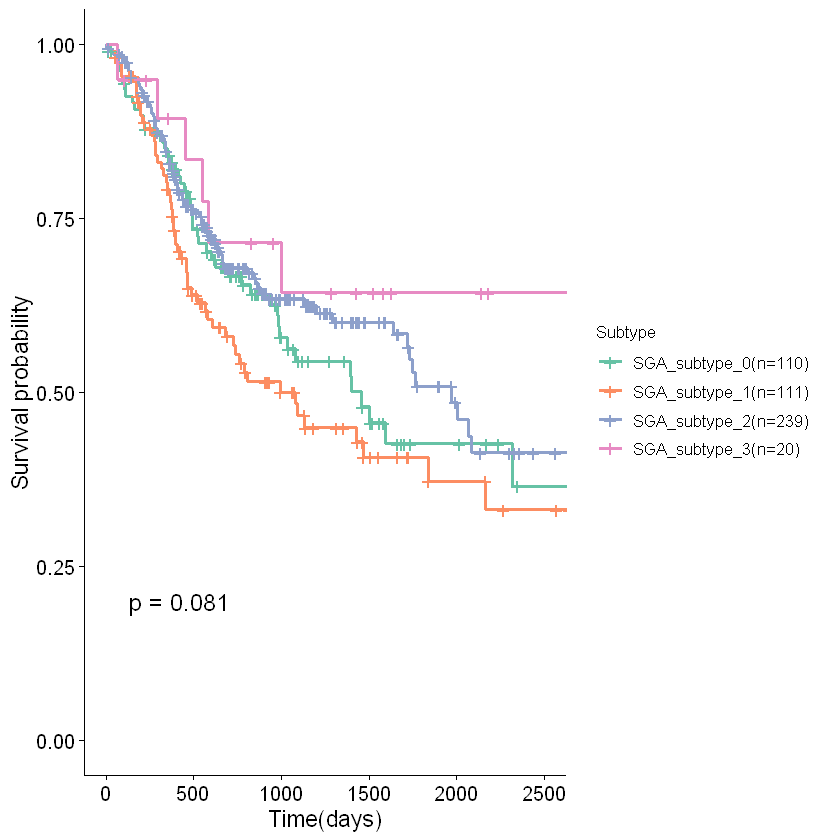

[1] "S_Dct"


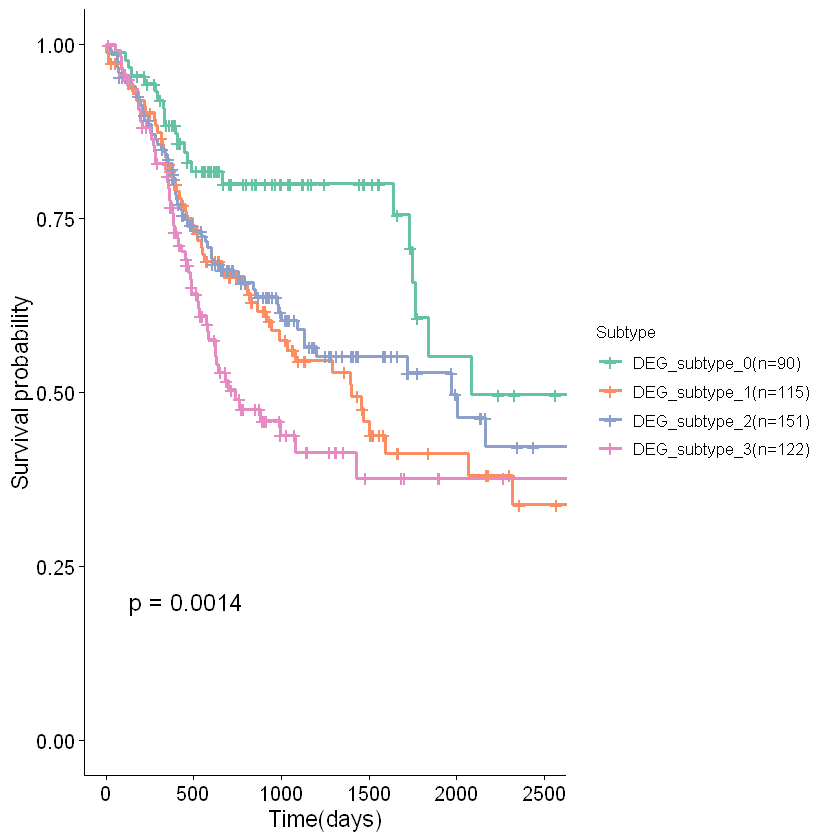

[1] "S_Pci"


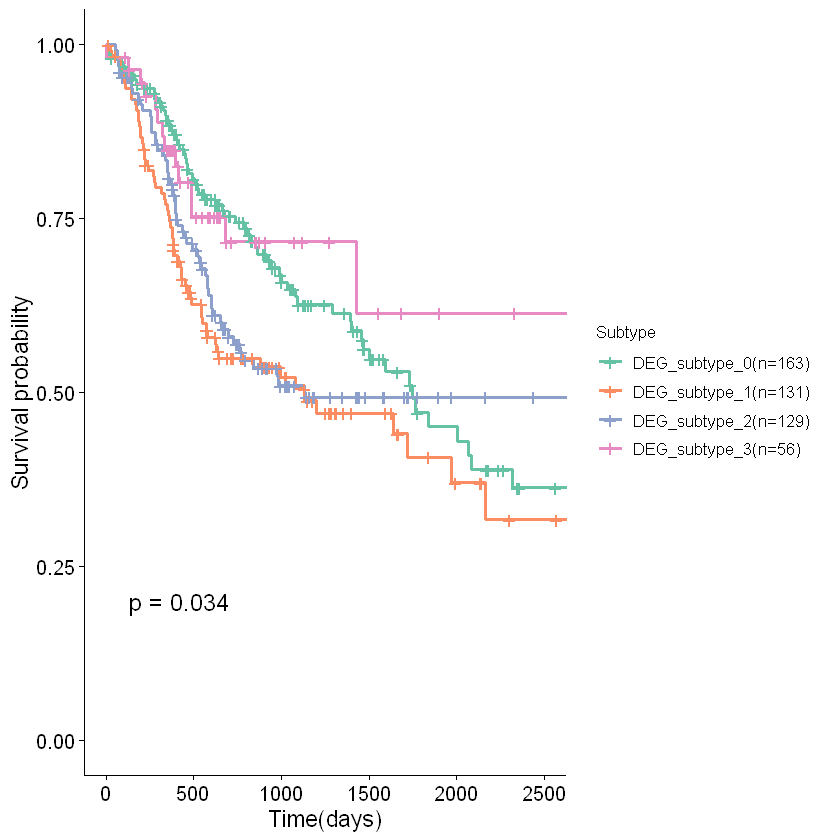

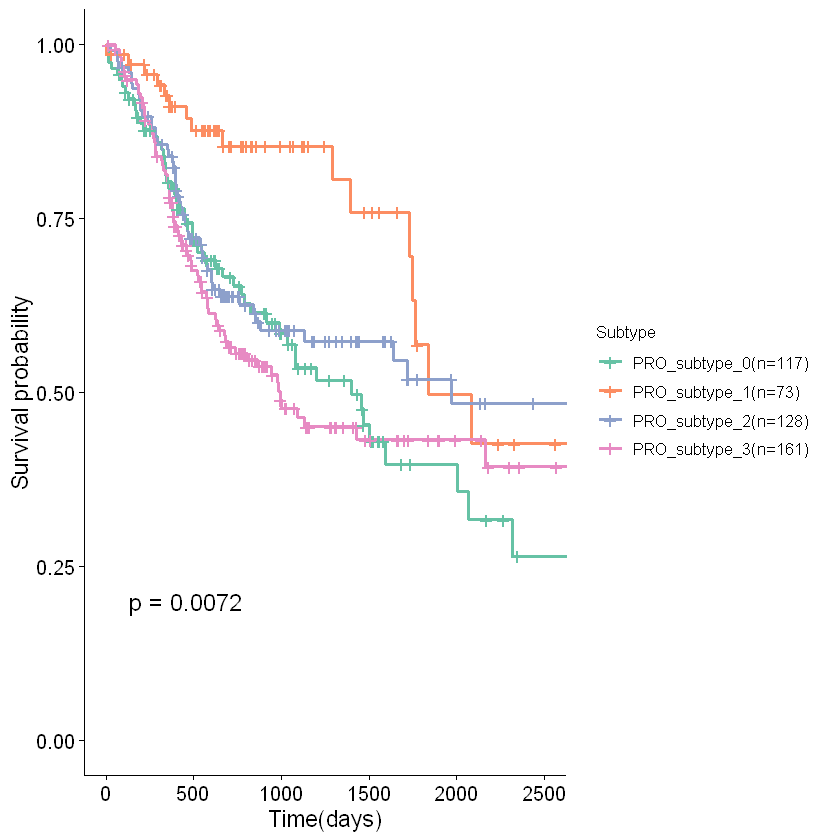

In [67]:
# install.packages("survival")
# install.packages("survminer")

library("survival")
library("survminer")
# Survival curves with global p-valuea
lis = c("S_Ai", "S_Dci", "S_Dct", "S_Pci")

for (s in lis){
    
    print(s)
    data = read.csv(paste("chunhui/Output/HNSC/", s, "_HNSC_Sur.csv", sep=""), row.names = 1, as.is = TRUE)
    data[data["Days"]>2500, "Events"] = 0
    
    labn = c()
    for (i in (1:length(labs))){
    labs = c(unique(data$Groups))
    n = dim(data[which(data$Groups == labs[i]),])[1]
    labn = c(labn, paste(labs[i], "(n=", as.character(n), ")", sep=""))}
    
    fit <- survfit(Surv(Days, Events) ~ Groups, data = data)
    p = ggsurvplot(
        fit, data = data,
        legend.title = "Subtype", 
        legend.labs = labn, 
#         legend.labs = c('Atypical', 'Basal', 'Classical', 'Mesenchymal'),
        legend = "right",
        pval = TRUE, 
        palette = c('#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'), 
        xlim = c(0,2500), 
        break.x.by = c(500),
        xlab="Time(days)")
    
    print(p)
    ggsave( plot = print(p), 
           filename = paste("HNSC_plot/",s ,"_surv.png", sep=""),
           width = 8, height = 5，units="in")
}

# Expression Subgroup

In [2]:
# cox - regression single factor
hnsc = read.csv("chunhui/Output/HNSC/S_Pci_HNSC_cox.csv", row.names=1)
hnsc[hnsc["Days"]>2000, "Events"] = 0
S_Pci = read.csv("chunhui/Output/HNSC/S_Pci_clu.csv", row.names=1)

x = "Surv(Days, Groups) ~ "
for (ele in colnames(S_Pci)){
    x = paste(x, ele, sep=" + ")
    }
z = as.formula(x)

res.cox <- coxph(z, data = hnsc)
print(summary(res.cox))

# coe = res.cox$coefficients
# data.frame(sort(coe))
# mean(abs(coe))

ERROR: Error in coxph(z, data = hnsc): an id statement is required for multi-state models


# Gene Subgroup

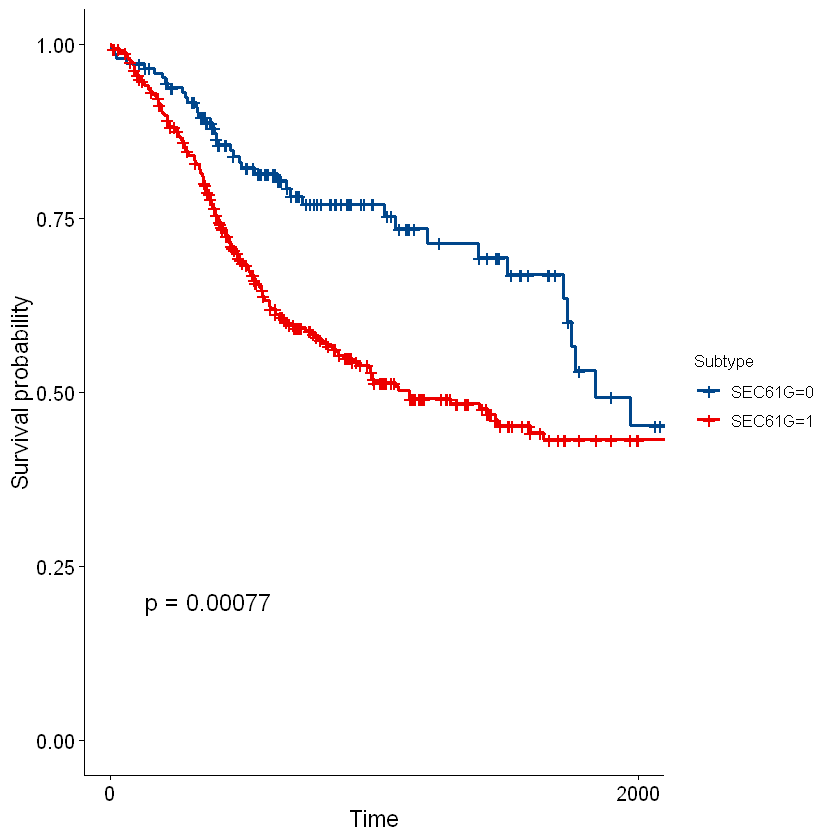

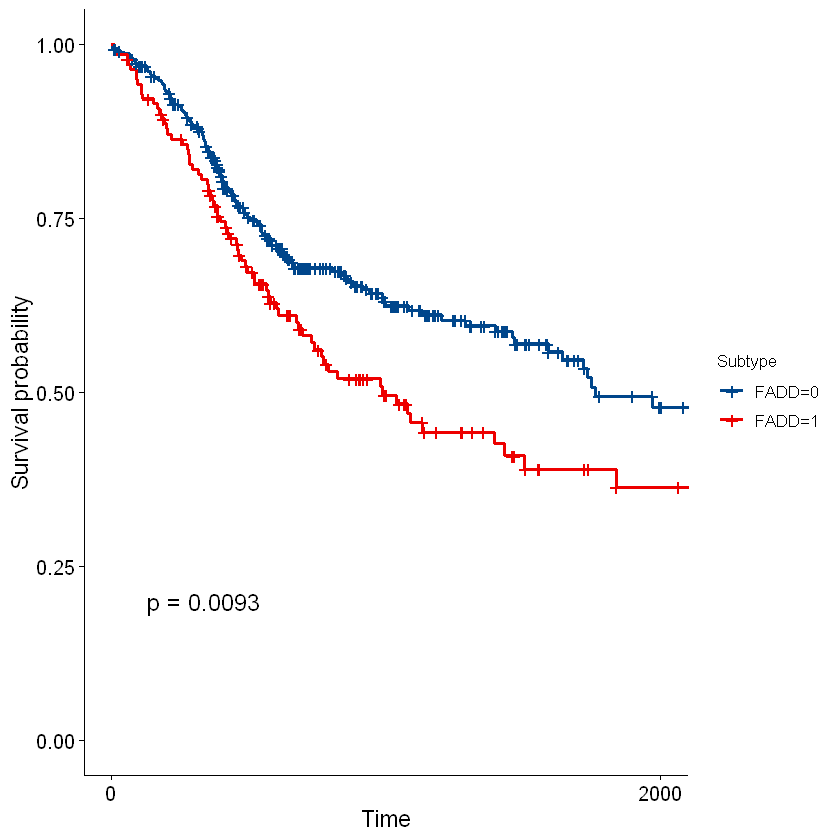

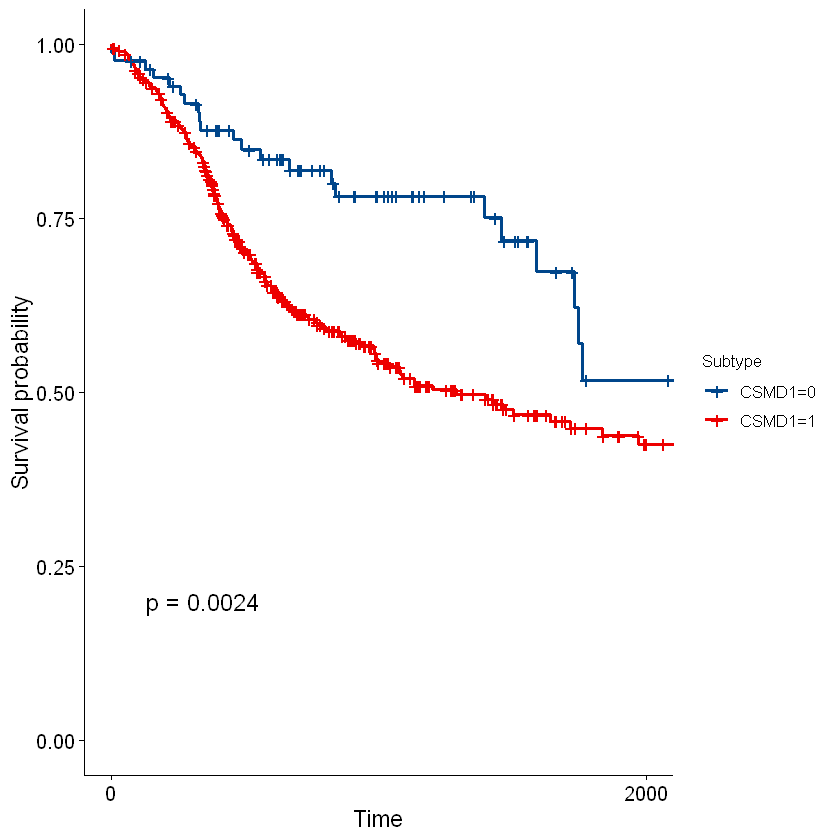

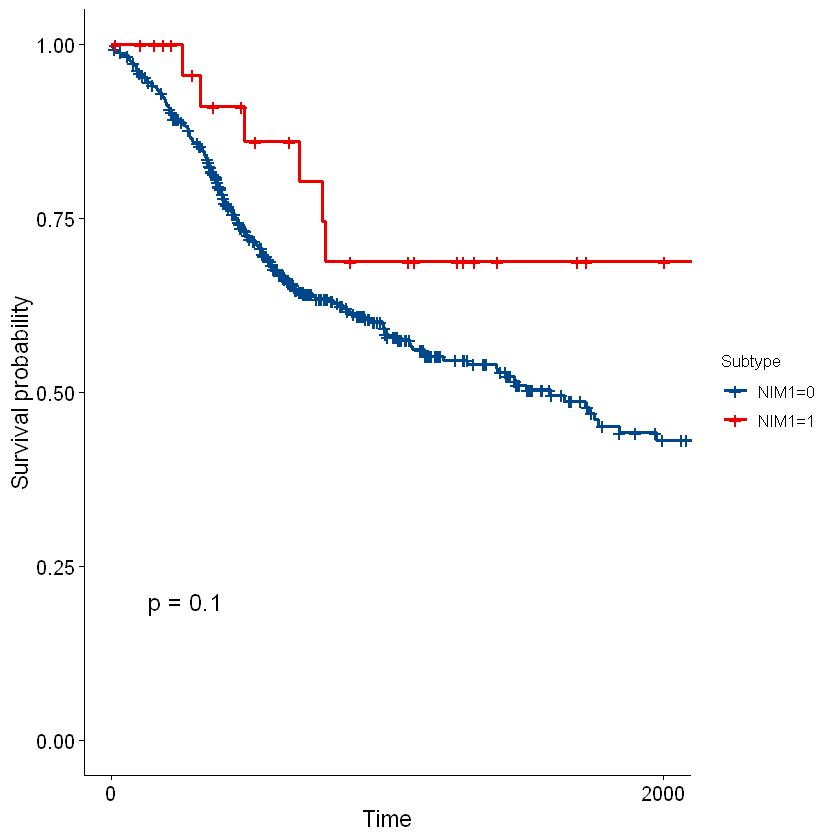

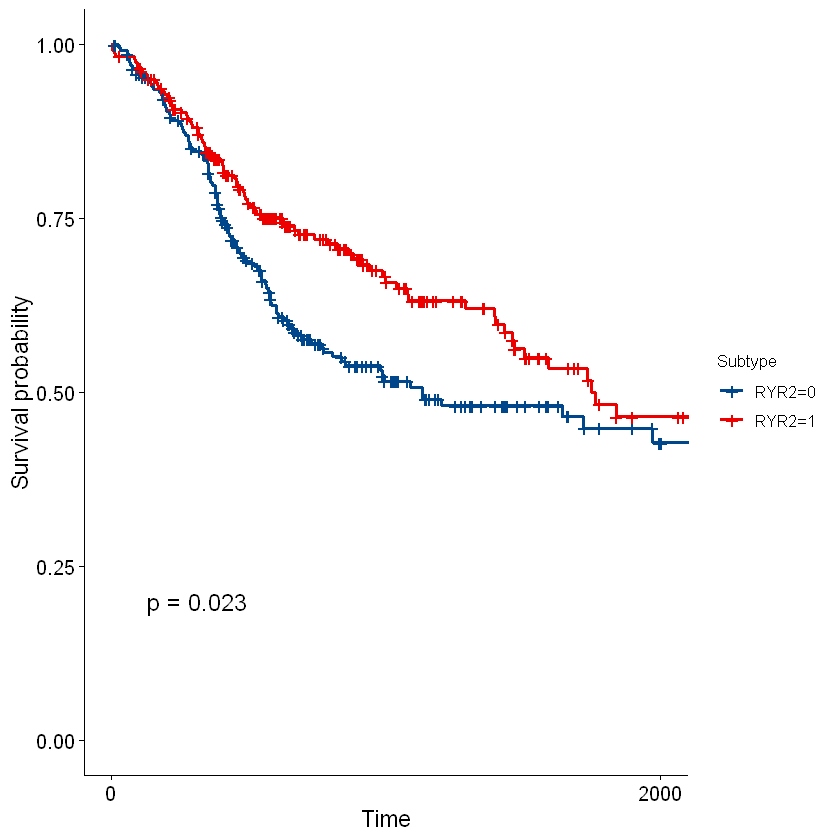

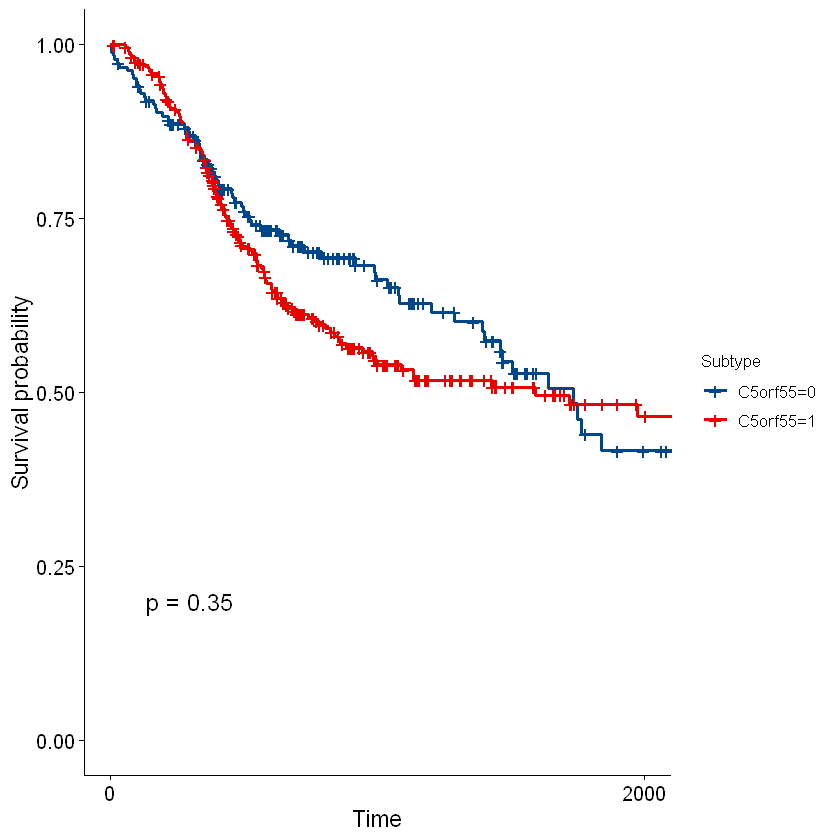

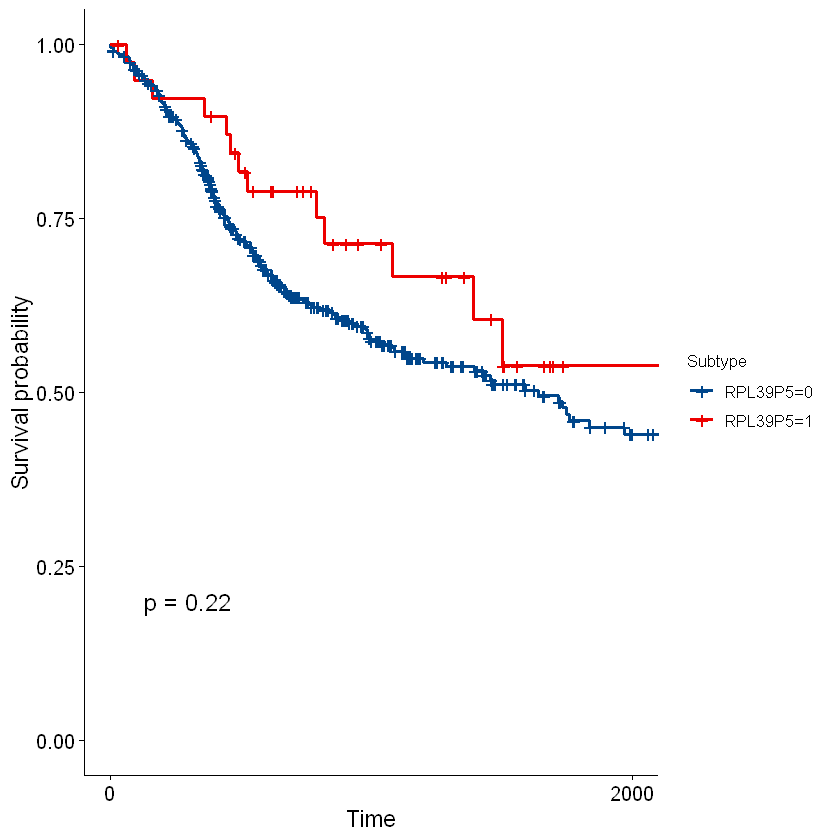

In [4]:
# plot survival
# var_l = c("SEC61G", "FADD", "CSMD1", "NIM1", "FLG", "RYR2", "C5orf55", "CSMD3", "KDM6A","RPL39P5", "SI", "ERLIN2")
var_l = c("SEC61G", "FADD", "CSMD1", "NIM1", "RYR2", "C5orf55", "RPL39P5")

for (ele in var_l){
    
    x = paste("Surv(Days, Events) ~", ele, sep=" ")
    z = as.formula(x)
    fit <- do.call(survfit,list(formula=z, data=hnsc))
    print(ggsurvplot(fit, data = hnsc,
               legend.title = "Subtype",
               legend.labs = levels(hnsc[ele]),
               legend = "right",
               pval = TRUE, palette = "lancet", xlim = c(0,2000)))
}

# Cox Regression

In [ ]:
# install.packages("My.stepwise")
# install.packages("glmnet")
library(My.stepwise)
# Not run:
# The data 'lung' is available in the 'survival' package.
# End(Not run)

my.data <- na.omit(hnsc)

my.variable.list <- colnames(S_Pci)
My.stepwise.coxph(
    Time = "Days", Status = "Events", variable.list = my.variable.list, data = my.data, sle = 0.25, sls = 0.25)

library(glmnet)
load("VignetteExample.rdata")
cv.fit <- cv.glmnet(
    patient.data$x, Surv(patient.data$time, patient.data$status), 
    family="cox", maxit = 1000)
plot(cv.fit)

cv.fit$lambda.min
Coefficients <- coef(fit, s = cv.fit$lambda.min)
Active.Index <- which(Coefficients != 0)
Active.Coefficients <- Coefficients[Active.Index]
Active.Index
Active.Coefficients
load.Rdata("Pre_TCIinfo/Input/sigdriversNtarDEGs.p=0.05.DEGrate=0.2.RData")